1.	Tính lương trung bình của tất cả nhân viên.Tính lương trung bình theo giới tính (Gender).

In [33]:
import pandas as pd 

df = pd.read_csv('bai3_employees.csv')

avg_salary = df['Salary'].mean()
avg_salary_by_gender = df.groupby('Gender')['Salary'].mean()
print("Average Salary:", avg_salary)
print("Average Salary by Gender:")
print(avg_salary_by_gender)

Average Salary: 90662.181
Average Salary by Gender:
Gender
Female    90023.923434
Male      91180.669811
Name: Salary, dtype: float64


In [34]:
# Xoa khaon tran
df.columns = df.columns.str.strip()

2.	Vẽ đồ thị: Sử dụng biểu đồ cột (bar chart) để hiển thị lương trung bình của nhân viên theo giới tính.

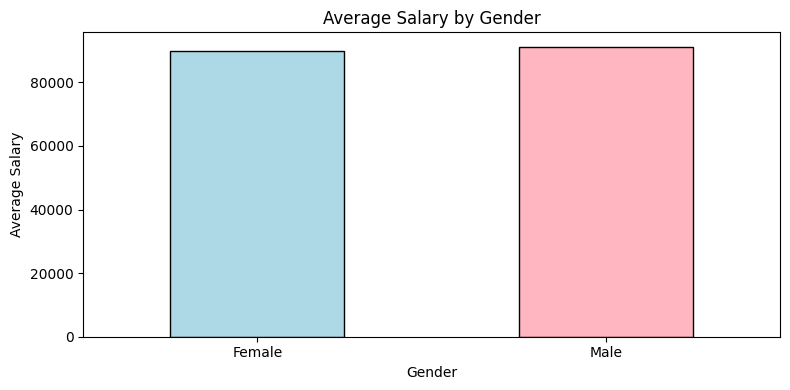

In [35]:
import matplotlib.pyplot as plt

avg_salary_by_gender.plot(kind='bar', figsize=(8, 4), color=['lightblue', 'lightpink'], edgecolor='black')
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

3.	Tạo một cột mới trong DataFrame tính toán tổng tiền thưởng cho mỗi nhân viên (tính bằng lương nhân với phần trăm thưởng).

In [36]:
if 'Bonus_Percentage' in df.columns:
    df['Total_Bonus'] = df['Salary'] * (df['Bonus_Percentage'] / 100)
else:
    df['Total_Bonus'] = df['Salary'] * 0.1

4.	Tìm nhân viên có tổng tiền thưởng cao nhất và thấp nhất.

In [37]:
highest_bonus = df.loc[df['Total_Bonus'].idxmax()]
lowest_bonus = df.loc[df['Total_Bonus'].idxmin()]
print("Employee with Highest Bonus:")
print(highest_bonus)
print("Employee with Lowest Bonus:")
print(lowest_bonus)

Employee with Highest Bonus:
FirstName           Katherine
Gender                 Female
StartDate           8/13/1996
LastLogin Time       12:21 AM
Salary                 149908
Bonus%                 18.912
SeniorManagement        False
Team                  Finance
Total_Bonus           14990.8
Name: 644, dtype: object
Employee with Lowest Bonus:
FirstName             Michael
Gender                   Male
StartDate           7/30/1993
LastLogin Time        5:35 PM
Salary                  35013
Bonus%                 14.879
SeniorManagement        False
Team                  Product
Total_Bonus            3501.3
Name: 576, dtype: object


5.	Vẽ đồ thị: Sử dụng biểu đồ cột để hiển thị 10 nhân viên có tổng tiền thưởng cao nhất.

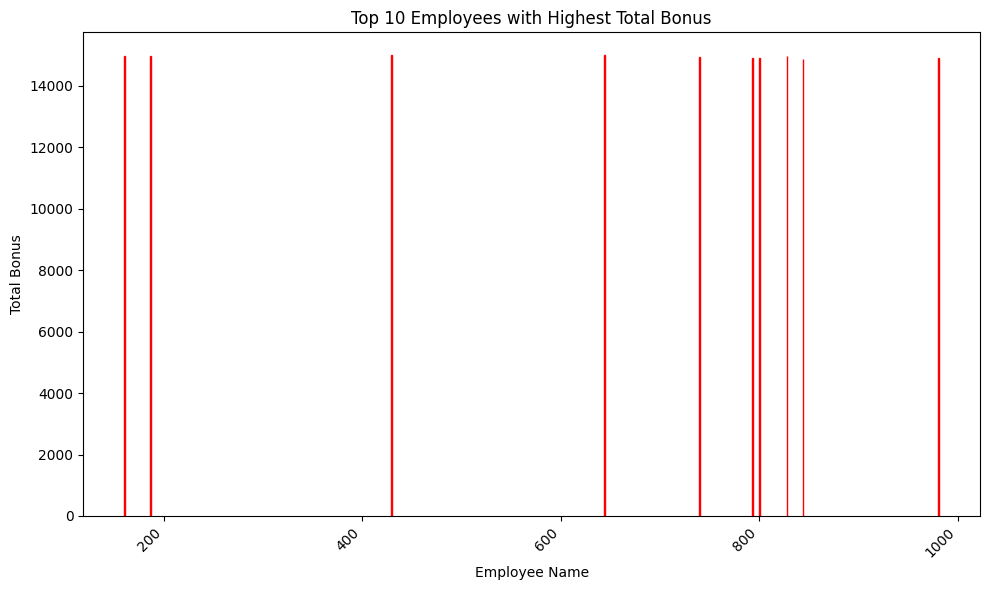

In [38]:
top_10_bonus = df.nlargest(10, 'Total_Bonus')
plt.figure(figsize=(10, 6))
plt.bar(top_10_bonus['Name'] if 'Name' in df.columns else top_10_bonus.index, top_10_bonus['Total_Bonus'], color='gold', edgecolor='red')
plt.title('Top 10 Employees with Highest Total Bonus')
plt.xlabel('Employee Name')
plt.ylabel('Total Bonus')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

6.	Tạo cột mới tính số năm làm việc của mỗi nhân viên (dựa vào Start Date và ngày hiện tại).

In [49]:
from datetime import datetime
df['Start Date'] = pd.to_datetime(df['StartDate'])
df['Years of Service'] = datetime.now().year - df['Start Date'].dt.year

7.	Tính số năm làm việc trung bình của nhân viên theo phòng ban (Team).

In [50]:
average_years_by_team = df.groupby('Team')['Years of Service'].mean()
print("Số năm làm việc trung bình theo phòng ban:")
print(average_years_by_team)

Số năm làm việc trung bình theo phòng ban:
Team
Business Development    23.900990
Client Services         26.386792
Distribution            24.488889
Engineering             23.858696
Finance                 25.852941
Human Resources         26.879121
Legal                   25.136364
Marketing               25.877551
Product                 26.189474
Sales                   26.510638
Name: Years of Service, dtype: float64


8.	Vẽ đồ thị để hiển thị sự phân phối số năm làm việc của nhân viên theo phòng ban.

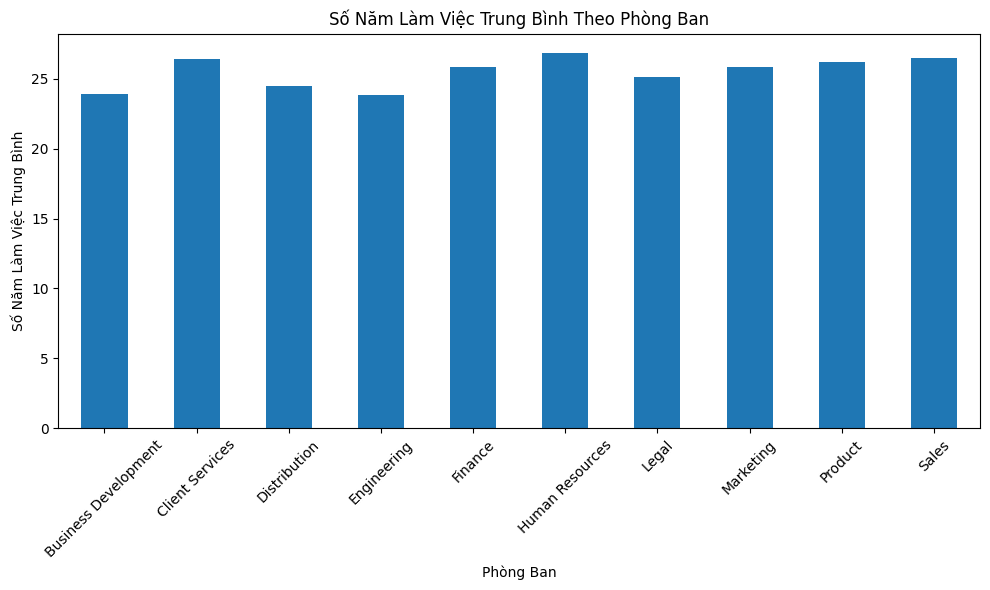

In [51]:
plt.figure(figsize=(10, 6))
average_years_by_team.plot(kind='bar', title='Số Năm Làm Việc Trung Bình Theo Phòng Ban')
plt.xlabel('Phòng Ban')
plt.ylabel('Số Năm Làm Việc Trung Bình')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

9.	Tính số lượng nhân viên trong mỗi phòng ban (Team). Tính tỷ lệ phần trăm số lượng nhân viên trong mỗi phòng ban.

In [52]:
employee_count_by_team = df['Team'].value_counts()
employee_percentage_by_team = df['Team'].value_counts(normalize=True) * 100
print("Số lượng nhân viên trong mỗi phòng ban:")
print(employee_count_by_team)
print("Tỷ lệ phần trăm nhân viên trong mỗi phòng ban:")
print(employee_percentage_by_team)

Số lượng nhân viên trong mỗi phòng ban:
Team
Client Services         106
Finance                 102
Business Development    101
Marketing                98
Product                  95
Sales                    94
Engineering              92
Human Resources          91
Distribution             90
Legal                    88
Name: count, dtype: int64
Tỷ lệ phần trăm nhân viên trong mỗi phòng ban:
Team
Client Services         11.076280
Finance                 10.658307
Business Development    10.553814
Marketing               10.240334
Product                  9.926855
Sales                    9.822362
Engineering              9.613375
Human Resources          9.508882
Distribution             9.404389
Legal                    9.195402
Name: proportion, dtype: float64


10.	Vẽ đồ thị: sử dụng biểu đồ tròn (pie chart) để hiển thị tỷ lệ phần trăm số lượng nhân viên của từng phòng ban.

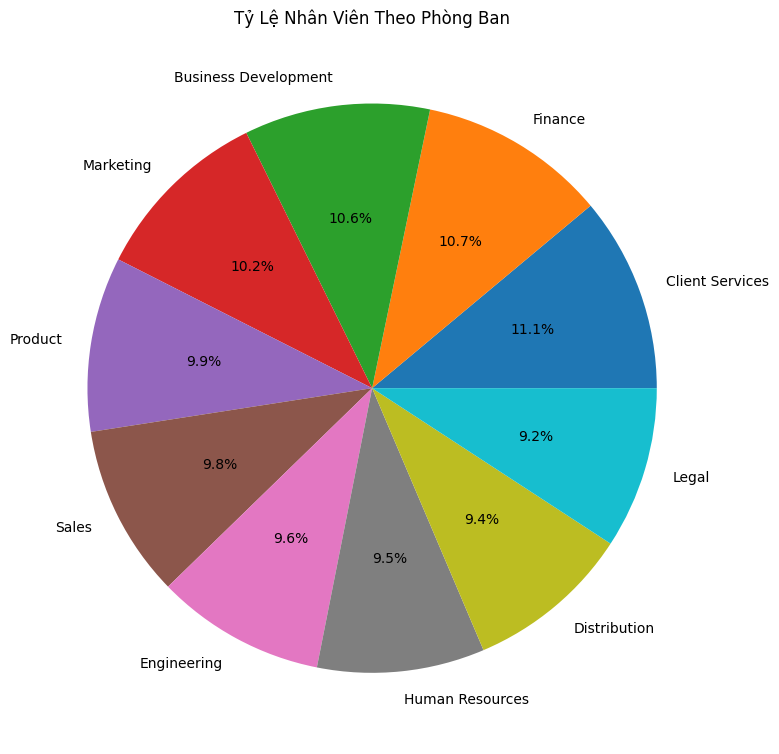

In [53]:
plt.figure(figsize=(8, 8))
employee_percentage_by_team.plot(kind='pie', autopct='%1.1f%%', title='Tỷ Lệ Nhân Viên Theo Phòng Ban')
plt.ylabel('')
plt.tight_layout()
plt.show()
